<a href="https://colab.research.google.com/github/KiranIT/DataScience/blob/master/DNN_with_tensorflow_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


In [0]:
import tensorflow as tf
from tensorflow import keras as ks

In [0]:
import pandas as pd, numpy as np

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(x_tr,y_tr),(x_te,y_te) = mnist.load_data()

In [0]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

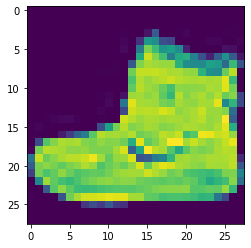

In [20]:
import matplotlib.pyplot as plt

plt.imshow(x_tr[0])

x_tr[0]

In [19]:
print('Training Dataset Shape: {}'.format(x_tr.shape))
print('No. of Training Dataset Labels: {}'.format(len(y_tr)))
print('Test Dataset Shape: {}'.format(x_te.shape))
print('No. of Test Dataset Labels: {}'.format(len(y_te)))

Training Dataset Shape: (60000, 28, 28)
No. of Training Dataset Labels: 60000
Test Dataset Shape: (10000, 28, 28)
No. of Test Dataset Labels: 10000


In [0]:
x_tr = x_tr/255.0

x_te = x_te/255.0

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [53]:
model.fit(x_tr,y_tr,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4960 - acc: 0.8212
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3702 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3360 - acc: 0.8765
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3122 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2955 - acc: 0.8902
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2822 - acc: 0.8940
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2696 - acc: 0.8984
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2600 - acc: 0.9025
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2497 - acc: 0.9054
Epoch 10/10
60000/60000 [==============================] - 

In [45]:
loss,acc = model.evaluate(x_te,y_te)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3399 - acc: 0.8811


In [46]:
loss,acc = model.evaluate(x_tr,y_tr)

60000/60000 [==============================] - 2s 36us/sample - loss: 0.2374 - acc: 0.9075
